# Individual Project 4
--- 
**Author:** Jaylon Kiper  
**Version:** 1.0  
**Semester:** Spring 2021  
**Summary:**
    
The goal of this project is to use Pandas/Matplotlib/Seaborn to clean up a data set and explore it with techniques
you used in your previous two assignments.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics

## Part 1 – The Notebook
1. Choose a data set to explore from any of the numerous sources available like Kaggle, UCI Machine
Learning Repository, etc. Your data set should have at least 25 variables with a good mix of discrete
(categorical) and continuous variables. For example, a data set with 24 discrete variables and 1 continuous
is not adequate and vice versa. You need to be able to do pairwise plots, distribution plots, scatterplots, etc.
Projects with data sets without these specifications will marked down.

2. Using Pandas/Matplotlib/Seaborn and any other libraries you deem necessary, investigate this data set
using all of the techniques we have used for the past few weeks. For more guidance, review the
exploratory_analysis_template.docx attached to this assignment. It specifies the various data/plots I want
from your dataset. It is okay to have more code in your notebook than just what you need to produce
the data for the report. In fact it is likely that you will.

3. Ensure your notebook is organized and has proper Markdown comments, etc. You can assume that after
someone has read your report, they might want to see the raw notebook, so it should be clear.

## Reading the CSV File

In [3]:
df = pd.read_csv('Video_Games_Sales_2016.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### Grabbing all the column names

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

### Converting the Year_of_Release column from float to str

In [5]:
df['Year_of_Release'] = df['Year_of_Release'].astype(str)

### Checking the data types for each column

In [6]:
df.dtypes

Name                object
Platform            object
Year_of_Release     object
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

### Checking basic summary statistics with the describe function

In [7]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,0.263302,0.145045,0.077625,0.047343,0.533568,68.967679,26.360821,7.125046,162.229908
std,0.813565,0.503359,0.308871,0.186742,1.548125,13.938165,18.980495,1.500006,561.282326
min,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


### Correlation Martix/Heatmap for all continuous variables

In [8]:
df.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
NA_Sales,1.000000,0.765341,0.449668,0.638695,0.941014,0.240755,0.295413,0.086200,0.246429
EU_Sales,0.765341,1.000000,0.435079,0.722796,0.901237,0.220752,0.277533,0.055337,0.283360
JP_Sales,0.449668,0.435079,1.000000,0.291090,0.612341,0.152593,0.180219,0.125598,0.075638
Other_Sales,0.638695,0.722796,0.291090,1.000000,0.749258,0.198554,0.251639,0.057119,0.238982
Global_Sales,0.941014,0.901237,0.612341,0.749258,1.000000,0.245471,0.303571,0.088139,0.265012
Critic_Score,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.580878,0.264376
Critic_Count,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.194133,0.362334
User_Score,0.086200,0.055337,0.125598,0.057119,0.088139,0.580878,0.194133,1.000000,0.027044
User_Count,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,0.027044,1.000000


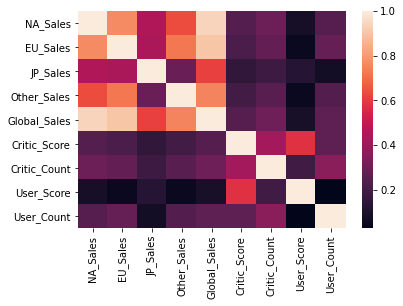

In [9]:
sns.heatmap(df.corr())
plt.savefig('corr.png')

### Value count for all gaming platforms

In [10]:
plt_count = df['Platform'].value_counts()
plt_count

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

### Value count for all years each game was released

In [11]:
year_count = df['Year_of_Release'].value_counts()
year_count

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
nan        269
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

### Value count for all gaming genres

In [12]:
genre_count = df['Genre'].value_counts()
genre_count

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

### Value count for all publishers

In [13]:
pub_count = df['Publisher'].value_counts()
pub_count

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          932
Konami Digital Entertainment     834
                                ... 
Paon Corporation                   1
id Software                        1
Pony Canyon                        1
Illusion Softworks                 1
Mirai Shounen                      1
Name: Publisher, Length: 581, dtype: int64

### Value count for all gaming development companies

In [14]:
dev_count = df['Developer'].value_counts()
dev_count

Ubisoft                        203
EA Sports                      172
EA Canada                      167
Konami                         162
Capcom                         139
                              ... 
Independent Arts                 1
Machineworks Northwest, WXP      1
Eighting, Takara Tomy            1
Next Wave Team                   1
Turbine Inc.                     1
Name: Developer, Length: 1696, dtype: int64

### Value count for all ESRB ratings for each game

In [15]:
rating_count = df['Rating'].value_counts()
rating_count

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

### Bar chart showing the distinct count for each platform per game

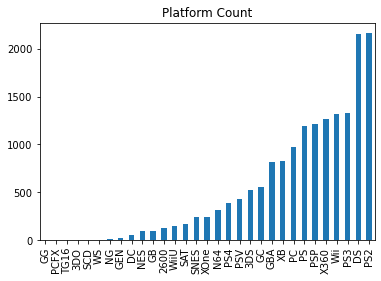

In [16]:
plt.title('Platform Count')
plt_plot = plt_count.sort_values().plot(kind = 'bar')

### Horizontal bar chart showing the distinct count for each genre per game

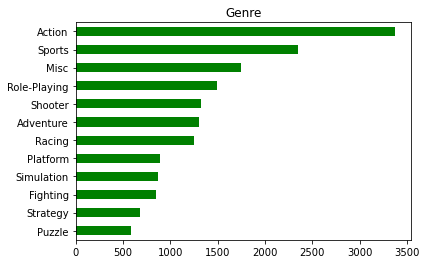

In [17]:
plt.title('Genre')
Genre_plot = genre_count.sort_values().plot(kind = 'barh', color = 'green')

### Distribution plot with the critic scores per game

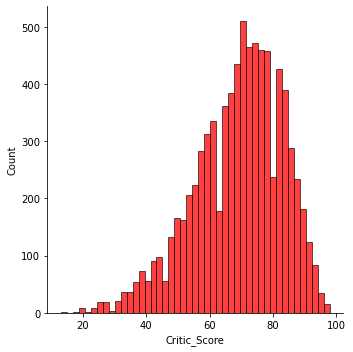

In [18]:
sns.displot(df.Critic_Score, color = 'red')

### Distribution plot with the user scores per game

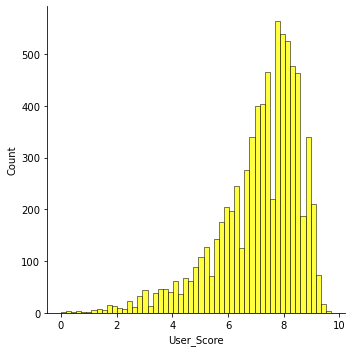

In [19]:
sns.displot(df.User_Score, color = 'yellow')

### Pairplot comparing the relationships between all games sales by genre

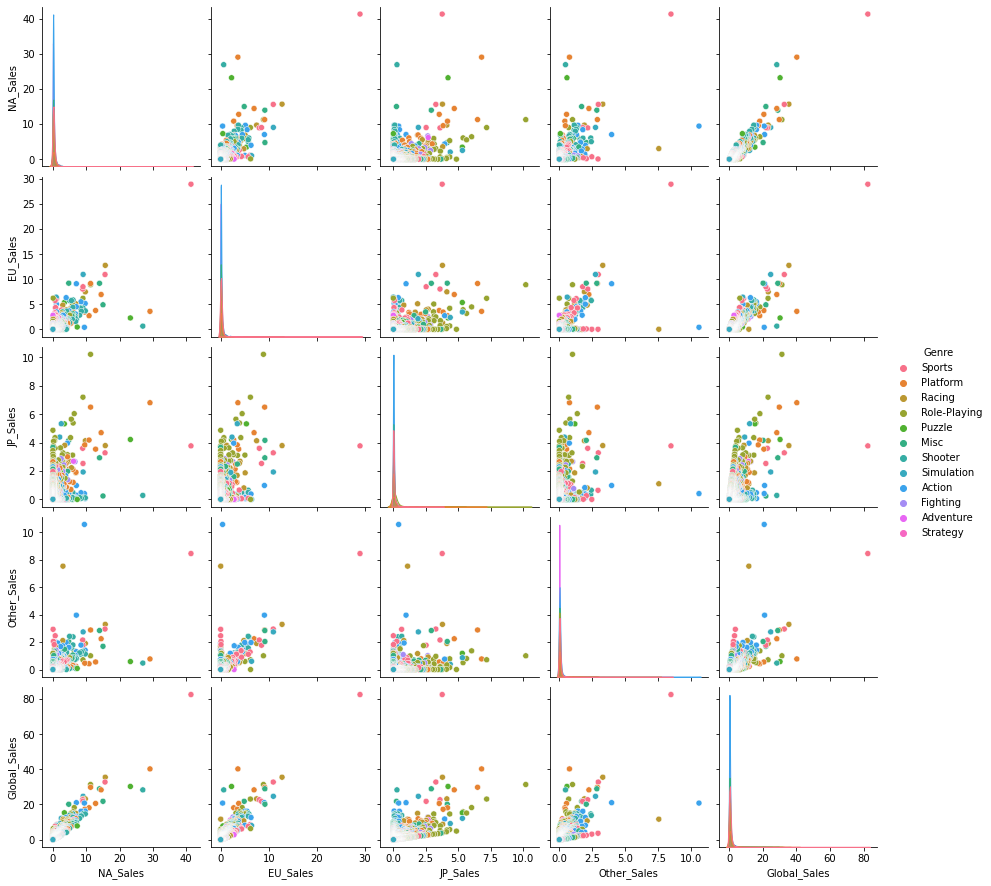

In [20]:
sns_plot = sns.pairplot(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Genre']], hue = 'Genre')
sns_plot.savefig("pairplot.png")

### Queries used to grab each game by their rating

In [21]:
E = df.query("Rating == 'E'")
E10 = df.query("Rating == 'E10+'")
T = df.query("Rating == 'T'")
M = df.query("Rating == 'M'")

### Reading the average sales, score, and count for each game by rating

In [22]:
E.mean()

NA_Sales         0.324058
EU_Sales         0.178008
JP_Sales         0.049652
Other_Sales      0.058689
Global_Sales     0.610679
Critic_Score    68.484687
Critic_Count    19.653490
User_Score       7.052379
User_Count      52.974737
dtype: float64

In [23]:
E10.mean()

NA_Sales         0.248817
EU_Sales         0.132761
JP_Sales         0.028310
Other_Sales      0.051803
Global_Sales     0.461838
Critic_Score    66.759392
Critic_Count    22.610912
User_Score       6.855225
User_Count      79.853308
dtype: float64

In [24]:
T.mean()

NA_Sales          0.256586
EU_Sales          0.144218
JP_Sales          0.051131
Other_Sales       0.052405
Global_Sales      0.504694
Critic_Score     68.828409
Critic_Count     28.296591
User_Score        7.286724
User_Count      109.534557
dtype: float64

In [25]:
M.mean()

NA_Sales          0.478874
EU_Sales          0.309642
JP_Sales          0.041100
Other_Sales       0.113308
Global_Sales      0.942956
Critic_Score     71.797033
Critic_Count     38.864464
User_Score        7.159881
User_Count      481.971014
dtype: float64

### Scatter subplot comparing Critic and User Score by the games rating

Text(0, 0.5, 'User Score')

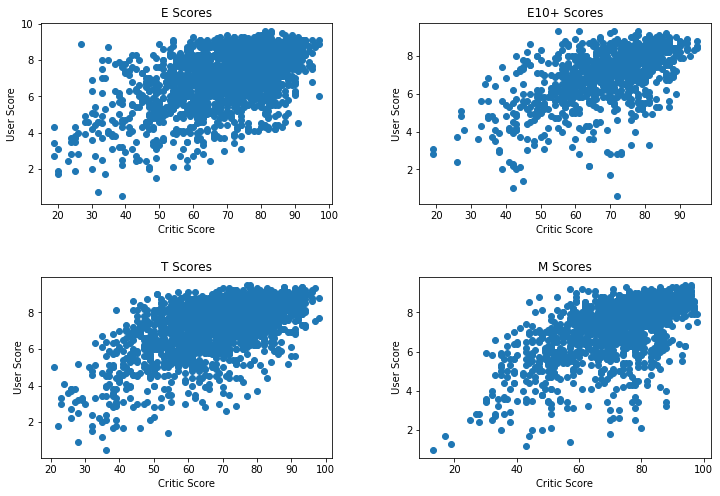

In [26]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

ax1 = fig.add_subplot(221)
ax1.scatter(E.Critic_Score,E.User_Score)
ax1.set_title("E Scores")
ax1.set_xlabel("Critic Score")
ax1.set_ylabel("User Score")

ax2 = fig.add_subplot(222)
ax2.scatter(E10.Critic_Score,E10.User_Score)
ax2.set_title("E10+ Scores")
ax2.set_xlabel("Critic Score")
ax2.set_ylabel("User Score")

ax3 = fig.add_subplot(223)
ax3.scatter(T.Critic_Score,T.User_Score)
ax3.set_title("T Scores")
ax3.set_xlabel("Critic Score")
ax3.set_ylabel("User Score")

ax4 = fig.add_subplot(224)
ax4.scatter(M.Critic_Score,M.User_Score)
ax4.set_title("M Scores")
ax4.set_xlabel("Critic Score")
ax4.set_ylabel("User Score")

### Countplot with a summer palette with ratings

<AxesSubplot:xlabel='Rating', ylabel='count'>

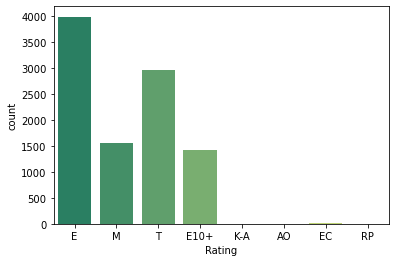

In [53]:
sns.countplot(x = "Rating",data = df, palette = "summer")